# Excercise 6
In this excercise we were asked to complete an already existing code, which simulated a 1D Ising Model. The code was teoretically able to measure the internal energy, but for it to do that we needed to implement a sampling algorithm. We added the Metropolis algorithm and the Gibbs one. We than added measures of heat capacity, magnetization and magnetic susceptibility. In the graphs below we plotted all measures, made with both Metropolis and Gibbs algorithms. We can clearly see that all values and trends are compatible with the analytic solutions we were presented in the assigment file. All measures are in "local" units, the ones for which $\mu_b=1$ and $k_b=1$.


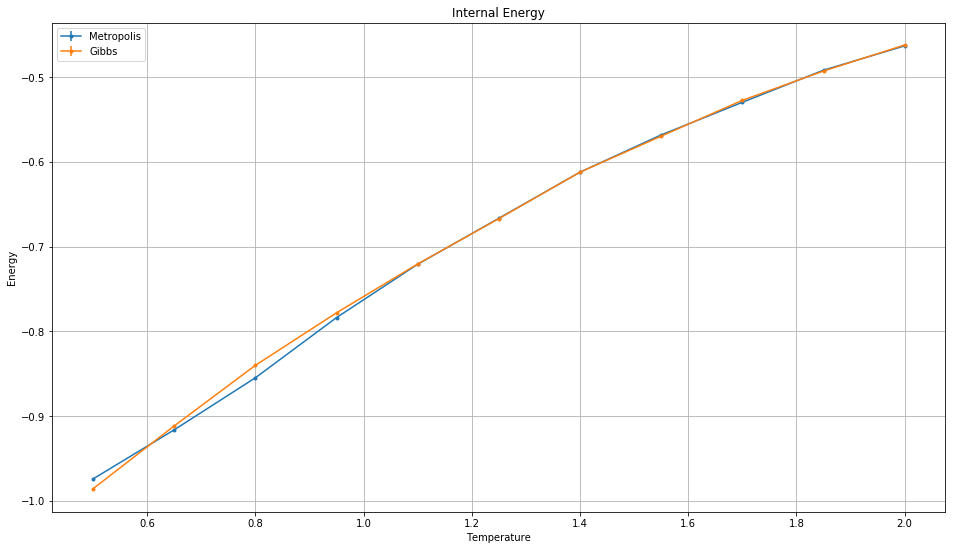

In [79]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x, y, err = np.loadtxt("output.ene_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metropolis")
x1, y1, err1 = np.loadtxt("output.ene_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
plt.title("Internal Energy")
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.legend(loc="best")
plt.grid(1)
plt.show()

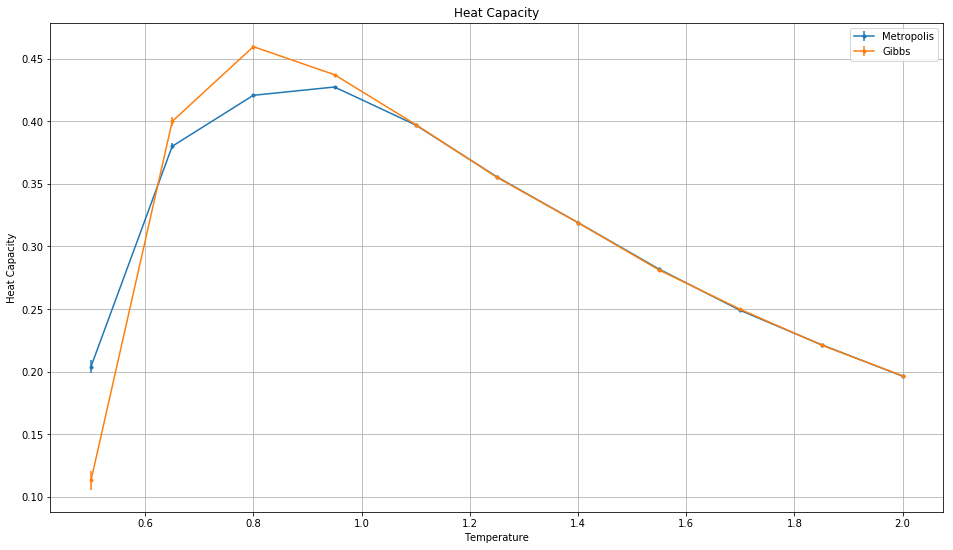

In [80]:
x, y, err = np.loadtxt("output.heat_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metropolis")
x1, y1, err1 = np.loadtxt("output.heat_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
plt.title("Heat Capacity")
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.legend(loc="best")
plt.grid(1)
plt.show()

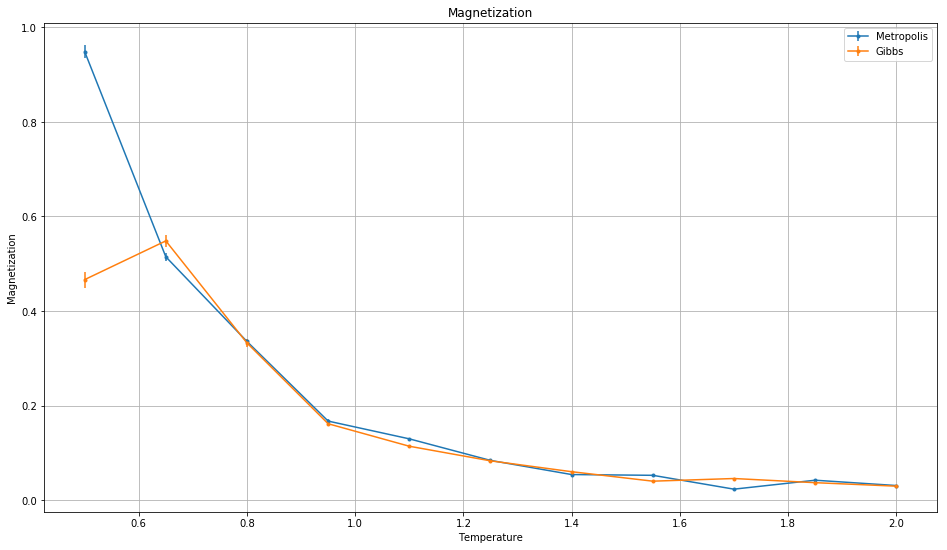

In [81]:
x, y, err = np.loadtxt("output.mag_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metropolis")
x1, y1, err1 = np.loadtxt("output.mag_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
plt.title("Magnetization")
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.legend(loc="best")
plt.grid(1)
plt.show()

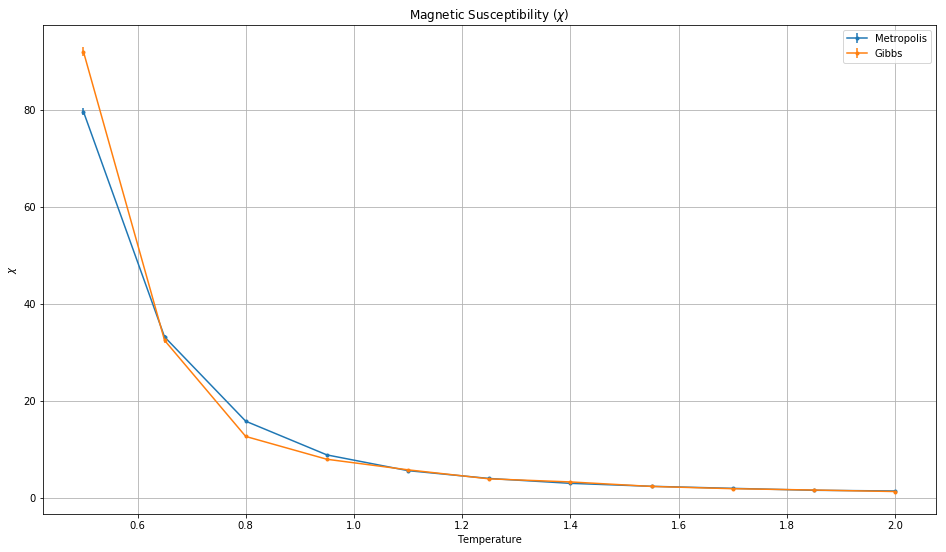

In [82]:
x, y, err = np.loadtxt("output.x_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metropolis")
x1, y1, err1 = np.loadtxt("output.x_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
plt.title("Magnetic Susceptibility ($\chi$)")
plt.xlabel('Temperature')
plt.ylabel('$\chi$')
plt.legend(loc="best")
plt.grid(1)
plt.show()